In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
path = "C:\\Users\\Nishant\\Desktop\\Data Science notes\\Data Science Projects\\Richter's Predictor Modeling Earthquake Damage\\"

train_values = "train_values.csv"
train_labels = "train_labels.csv"

xdf = pd.read_csv(path + train_values)

In [6]:
xdf.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [7]:
xdf.drop_duplicates(inplace = True)
xdf.dropna(axis = 0, inplace = True)

In [8]:
xdf.describe(include = "all")

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601,260601,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216757,219196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,NaN,NaN,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,NaN,NaN,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
xdf.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [10]:
print(xdf.columns)

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [11]:
bfeatures = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
        'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

ofeatures = ["land_surface_condition", "foundation_type", "roof_type", 
           "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]

In [12]:
odf = xdf[ofeatures]
bdf = xdf[bfeatures]

bdf.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
xdf.drop(ofeatures, axis = 1, inplace = True)
xdf.drop(bfeatures, axis = 1, inplace = True)
xdf.drop("building_id", axis = 1, inplace = True)

headers = xdf.columns

xdf.head(25)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
0,6,487,12198,2,30,6,5,1
1,8,900,2812,2,10,8,7,1
2,21,363,8973,2,10,5,5,1
3,22,418,10694,2,10,6,5,1
4,11,131,1488,3,30,8,9,1
5,8,558,6089,2,10,9,5,1
6,9,475,12066,2,25,3,4,1
7,20,323,12236,2,0,8,6,1
8,0,757,7219,2,15,8,6,1
9,26,886,994,1,0,13,4,1


In [14]:
scaler = StandardScaler()
scaler.fit(xdf)
xdf = scaler.transform(xdf)
xdf = pd.DataFrame(xdf, columns = headers)

xdf.columns

E:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Nishant\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'count_families'],
      dtype='object')

In [15]:
odf.describe()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [16]:
odf[ofeatures[0]].value_counts().to_frame()

,land_surface_condition
t,216757
n,35528
o,8316


In [17]:
odf[ofeatures[1]].value_counts().to_frame()

,foundation_type
r,219196
w,15118
u,14260
i,10579
h,1448


In [18]:
odf[ofeatures[2]].value_counts().to_frame()

,roof_type
n,182842
q,61576
x,16183


In [19]:
odf[ofeatures[3]].value_counts().to_frame()

,ground_floor_type
f,209619
x,24877
v,24593
z,1004
m,508


In [20]:
odf[ofeatures[4]].value_counts().to_frame()

,other_floor_type
q,165282
x,43448
j,39843
s,12028


In [21]:
odf[ofeatures[5]].value_counts().to_frame()

,position
s,202090
t,42896
j,13282
o,2333


In [22]:
odf[ofeatures[6]].value_counts().to_frame() 

,plan_configuration
d,250072
q,5692
u,3649
s,346
c,325
a,252
o,159
m,46
n,38
f,22


In [23]:
odf[ofeatures[7]].value_counts().to_frame()

,legal_ownership_status
v,250939
a,5512
w,2677
r,1473


In [24]:
odf[ofeatures[0]].replace('t', 1, inplace = True)
odf[ofeatures[0]].replace('n', 2, inplace = True)
odf[ofeatures[0]].replace('o', 3, inplace = True)

In [25]:
odf[ofeatures[1]].replace('r', 1, inplace = True)
odf[ofeatures[1]].replace('w', 2, inplace = True)
odf[ofeatures[1]].replace('u', 3, inplace = True)
odf[ofeatures[1]].replace('i', 4, inplace = True)
odf[ofeatures[1]].replace('h', 5, inplace = True)

In [26]:
odf[ofeatures[2]].replace('n', 1, inplace = True)
odf[ofeatures[2]].replace('q', 2, inplace = True)
odf[ofeatures[2]].replace('x', 3, inplace = True)

In [27]:
odf[ofeatures[3]].replace('f', 1, inplace = True)
odf[ofeatures[3]].replace('x', 2, inplace = True)
odf[ofeatures[3]].replace('v', 3, inplace = True)
odf[ofeatures[3]].replace('z', 4, inplace = True)
odf[ofeatures[3]].replace('m', 5, inplace = True)

In [28]:
odf[ofeatures[4]].replace('q', 1, inplace = True)
odf[ofeatures[4]].replace('x', 2, inplace = True)
odf[ofeatures[4]].replace('j', 3, inplace = True)
odf[ofeatures[4]].replace('s', 4, inplace = True)

In [29]:
odf[ofeatures[5]].replace('s', 1, inplace = True)
odf[ofeatures[5]].replace('t', 2, inplace = True)
odf[ofeatures[5]].replace('j', 3, inplace = True)
odf[ofeatures[5]].replace('o', 4, inplace = True)

In [30]:
odf[ofeatures[6]].replace('d', 1, inplace = True)    
odf[ofeatures[6]].replace('q', 2, inplace = True)
odf[ofeatures[6]].replace('u', 3, inplace = True)
odf[ofeatures[6]].replace('s', 4, inplace = True)
odf[ofeatures[6]].replace('c', 5, inplace = True)
odf[ofeatures[6]].replace('a', 6, inplace = True)
odf[ofeatures[6]].replace('o', 7, inplace = True)
odf[ofeatures[6]].replace('m', 8, inplace = True)
odf[ofeatures[6]].replace('n', 9, inplace = True)
odf[ofeatures[6]].replace('f', 10, inplace = True)

In [31]:
odf[ofeatures[7]].replace('v', 1, inplace = True)
odf[ofeatures[7]].replace('a', 2, inplace = True)
odf[ofeatures[7]].replace('w', 3, inplace = True)
odf[ofeatures[7]].replace('r', 4, inplace = True)

odf.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,1,1,1,1,1,2,1,1
1,3,1,1,2,1,1,1,1
2,1,1,1,1,2,2,1,1
3,1,1,1,1,2,1,1,1
4,1,1,1,1,2,1,1,1


In [32]:
xdf[ofeatures] = odf[ofeatures]
xdf[bfeatures] = bdf[bfeatures]

label_df = pd.read_csv(path + train_labels)
label_df.drop('building_id', axis = 1, inplace = True)

xdf['damage_grade'] = label_df['damage_grade']

xdf.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,-0.983414,-0.518705,1.629055,-0.178274,0.047100,-0.459460,-0.226419,0.038365,1,1,...,0,0,0,0,0,0,0,0,0,3
1,-0.734459,0.481998,-0.945017,-0.178274,-0.224765,-0.004110,0.816109,0.038365,3,1,...,0,0,0,0,0,0,0,0,0,2
2,0.883744,-0.819158,0.744612,-0.178274,-0.224765,-0.687135,-0.226419,0.038365,1,1,...,0,0,0,0,0,0,0,0,0,3
3,1.008221,-0.685893,1.216589,-0.178274,-0.224765,-0.459460,-0.226419,0.038365,1,1,...,0,0,0,0,0,0,0,0,0,2
4,-0.361028,-1.381296,-1.308119,1.195989,0.047100,-0.004110,1.858636,0.038365,1,1,...,0,0,0,0,0,0,0,0,0,3


In [33]:
xdf.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,2.606010e+05,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,-9.762282e-16,-5.359383e-17,-1.073202e-16,1.171892e-15,-6.061013e-16,6.753314e-16,-5.253162e-16,5.016795e-15,1.200153,1.311461,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.473196,0.796329,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,-1.730277e+00,-1.698710e+00,-1.716197e+00,-1.552536e+00,-3.606979e-01,-1.597836e+00,-1.790210e+00,-2.351760e+00,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-8.589365e-01,-8.506572e-01,-8.734392e-01,-1.782737e-01,-2.247652e-01,-6.871352e-01,-7.476826e-01,3.836475e-02,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,-2.365506e-01,2.242047e-03,3.324917e-03,-1.782737e-01,-1.567988e-01,-2.317848e-01,-2.264188e-01,3.836475e-02,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,8.837440e-01,8.454493e-01,8.650055e-01,-1.782737e-01,4.710030e-02,2.235655e-01,2.948449e-01,3.836475e-02,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,2.004039e+00,1.758924e+00,1.730251e+00,9.441562e+00,1.316461e+01,2.094201e+01,1.384770e+01,1.915936e+01,3.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [34]:
features = xdf.columns
features

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'count_families', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry'

In [35]:
corr = xdf.corr()

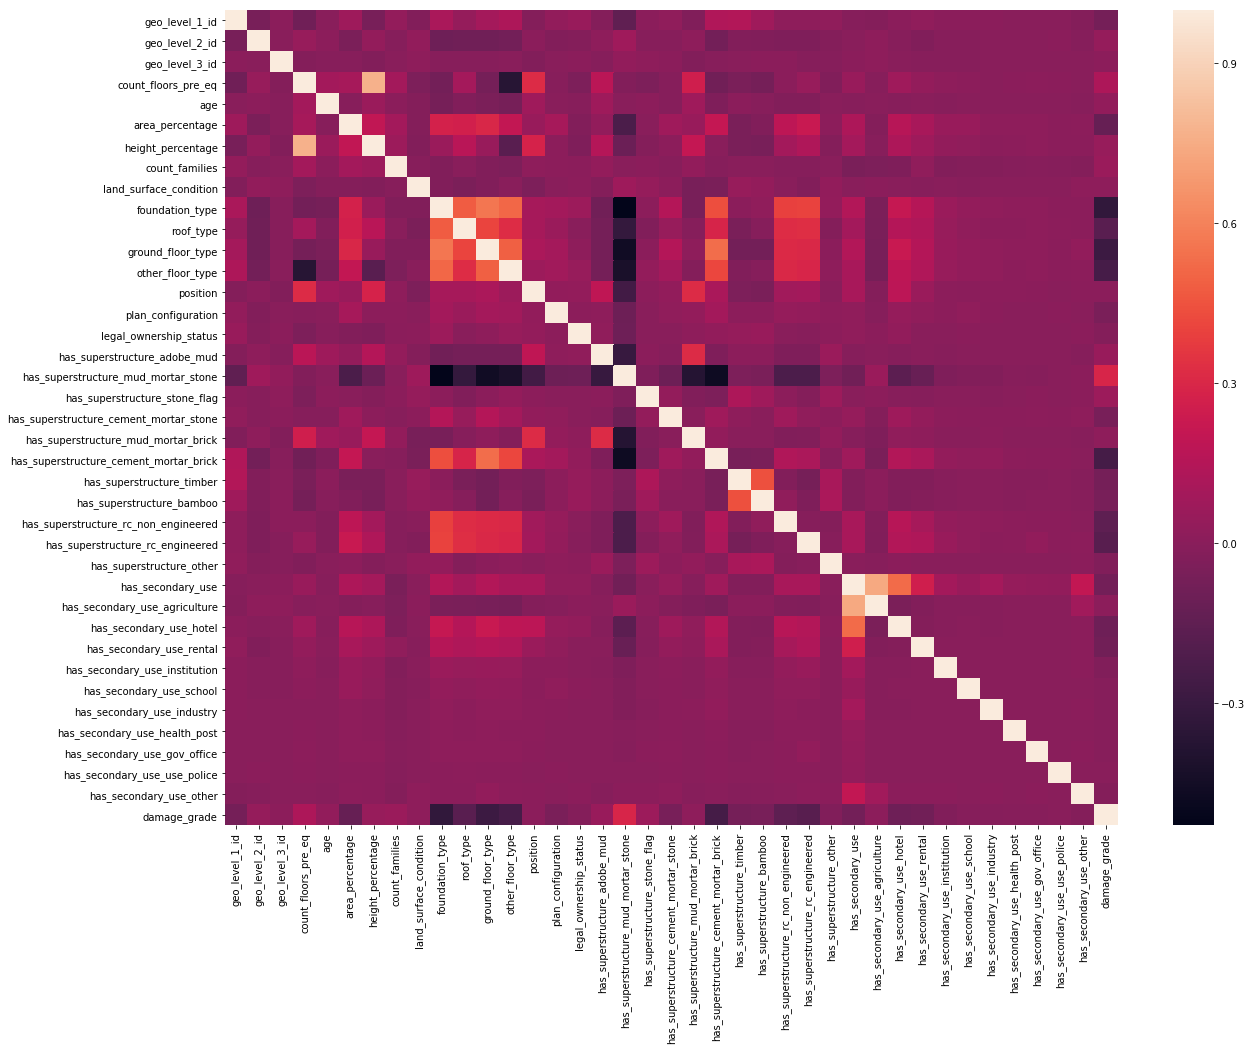

In [36]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels = xdf.columns, yticklabels = xdf.columns)

In [37]:
xdf.drop(['foundation_type', 'ground_floor_type'], axis = 1, inplace = True)

In [38]:
xdf.describe()
labels = xdf['damage_grade']
xdf.drop(['damage_grade'], axis = 1, inplace = True)

In [39]:
train_x, test_x, train_y, test_y = train_test_split(xdf, labels, test_size=0.3, random_state = 10)

# Model 1: Decision_Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

In [41]:
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth = 20, presort = False)
tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
preds = tree_clf.predict(train_x)

In [43]:
preds

array([3, 2, 1, ..., 3, 3, 3], dtype=int64)

In [44]:
print("Accuracy : {} \nMean_absolute_error: {}".format(accuracy_score(preds, train_y), mean_absolute_error(preds, train_y)))

Accuracy : 0.8500328911303585 
Mean_absolute_error: 0.1522475605744984


# Model 2: Random_Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

random_forest_clf = RandomForestRegressor(random_state = 1, n_estimators = 100, criterion = 'mse', min_samples_leaf = 2)
random_forest_clf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [46]:
preds = random_forest_clf.predict(train_x)

In [47]:
print("Mean_absolute_error: {}".format(mean_absolute_error(preds, train_y)))

Mean_absolute_error: 0.1954541001842375


In [48]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

train_x_reduced = pd.DataFrame(imp.fit_transform(train_x))
train_x_reduced.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,...,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.000000,182420.00000
mean,-0.002765,0.001512,0.000321,0.001024,0.000990,-0.000417,0.001138,0.001298,1.200340,1.360766,...,0.064324,0.033878,0.008146,0.000910,0.000356,0.001074,0.000170,0.000148,0.000104,0.00529
std,0.999786,1.000242,1.000554,1.001640,1.008354,0.994834,1.004732,1.003765,0.473845,0.596186,...,0.245330,0.180915,0.089887,0.030152,0.018873,0.032761,0.013035,0.012165,0.010205,0.07254
min,-1.730277,-1.698710,-1.716197,-1.552536,-0.360698,-1.597836,-1.790210,-2.351760,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-0.858937,-0.850657,-0.873988,-0.178274,-0.224765,-0.687135,-0.747683,0.038365,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,-0.236551,0.011934,0.003599,-0.178274,-0.156799,-0.231785,-0.226419,0.038365,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.883744,0.845449,0.865554,-0.178274,0.047100,0.223565,0.294845,0.038365,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.004039,1.758924,1.730251,9.441562,13.164610,20.942006,13.847703,19.159364,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Trick to find columns of certain dtype

s = (X_train.dtypes == 'object')    #List of all the columns having dtype as object<br>
object_cols = list(s[s].index)     

print("Categorical variables:")<br>
print(object_cols)

#Code to use LabelEncoder to encode categorical columns

In [49]:
from sklearn.preprocessing import LabelEncoder

xt = pd.read_csv(path + train_values)
xt.head()

object_columns = (xt.dtypes == 'object')
object_columns = list(object_columns[object_columns].index) 
object_columns

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [50]:
new_df = pd.DataFrame(xt[object_columns])
new_df.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,t,r,n,f,q,t,d,v
1,o,r,n,x,q,s,d,v
2,t,r,n,f,x,t,d,v
3,t,r,n,f,x,s,d,v
4,t,r,n,f,x,s,d,v


In [51]:
encoder = LabelEncoder()
for values in object_columns:
    new_df[values] = encoder.fit_transform(new_df[values])
new_df.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,2,2,0,0,1,3,2,2
1,1,2,0,3,1,2,2,2
2,2,2,0,0,3,3,2,2
3,2,2,0,0,3,2,2,2
4,2,2,0,0,3,2,2,2


In [125]:
import pandas as pd
path = "C:\\Users\\Nishant\\Desktop\\Data Science notes\\Data Science Projects\\Richter's Predictor Modeling Earthquake Damage\\"
test_values = "test_values.csv"
test_df = pd.read_csv(path + test_values)

test_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [126]:
test_df.drop(['building_id'], axis = 1, inplace = True)

object_columns = (test_df.dtypes == 'object')
object_columns = list(object_columns[object_columns].index) 
object_columns

test_obj_df = pd.DataFrame(test_df[object_columns], columns = object_columns)

encoder = LabelEncoder()
for values in object_columns:
    test_obj_df[values] = encoder.fit_transform(test_obj_df[values])

test_bin_df = pd.DataFrame(test_df[bfeatures], columns = bfeatures)

test_df.drop(bfeatures, axis = 1, inplace = True)
test_df.drop(object_columns, axis = 1, inplace = True)

In [127]:
headers = test_df.columns
scaler = StandardScaler()
scaler.fit(test_df)
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df, columns = headers)
test_df.head()

E:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Nishant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
0,0.387545,-0.261582,1.382754,1.190666,-0.089223,-0.231598,0.295710,0.039984
1,-0.982399,-1.362313,1.569122,-0.182880,-0.021116,1.138930,-0.228690,0.039984
2,1.010246,-1.657455,1.036602,-0.182880,-0.293547,-0.916862,-0.228690,0.039984
3,1.508407,-1.609071,-1.542679,-1.556426,-0.361655,2.509459,-1.277491,2.407631
4,0.387545,-1.004273,0.468179,1.190666,-0.157331,-0.003176,0.820111,0.039984


In [128]:
test_df[bfeatures] = test_bin_df[bfeatures]
test_df[object_columns] = test_obj_df[object_columns]
test_df.drop(['foundation_type', 'ground_floor_type'], axis = 1, inplace = True)
test_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,0.387545,-0.261582,1.382754,1.190666,-0.089223,-0.231598,0.295710,0.039984,0,1,...,0,0,0,0,2,0,1,2,2,2
1,-0.982399,-1.362313,1.569122,-0.182880,-0.021116,1.138930,-0.228690,0.039984,0,1,...,0,0,0,0,2,0,1,2,2,2
2,1.010246,-1.657455,1.036602,-0.182880,-0.293547,-0.916862,-0.228690,0.039984,0,1,...,0,0,0,0,2,0,1,2,2,2
3,1.508407,-1.609071,-1.542679,-1.556426,-0.361655,2.509459,-1.277491,2.407631,0,0,...,0,0,0,0,2,2,0,3,2,2
4,0.387545,-1.004273,0.468179,1.190666,-0.157331,-0.003176,0.820111,0.039984,0,1,...,0,0,0,0,2,1,1,3,2,2


In [129]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf1 = RandomForestClassifier(random_state = 1, criterion = 'gini', n_estimators = 500)

random_forest_clf1.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [130]:
preds = random_forest_clf1.predict(test_df)
preds1 = random_forest_clf1.predict(test_x)
print(accuracy_score(preds1, test_y))
pred_df = pd.DataFrame(preds, columns = ['damage_grade'])

test_df = pd.read_csv(path + test_values)
pred_df['building_id'] = test_df['building_id']
pred_df = pred_df[['building_id', 'damage_grade']]
pred_df.head()

0.7210191734564664


,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,2
4,421793,3


In [131]:
pred_df.to_csv(path + "submission.csv", index = False)

# Making use of pipelines


In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer